<a href="https://colab.research.google.com/github/BryanVelazco03/Valuing-Ships---Harvard-Business-School/blob/main/Caso_Compass_Maritime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso Compass Maritime



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
Ad_df = pd.read_excel('211702-XLS-ENG.xlsx', sheet_name='base')

In [ ]:
Ad_df.head()

,Unnamed: 0,Sale Date,Vessel Name,Sale Price,year Built,Age at Sale,Dead-Weight Tons,Trailing 1-Year Average Monthly Baltic Dry
0,1,2007-01-01,Lowlands Beilun,73.0,1999,8,170.2,4647.083333
1,2,2007-01-01,CHS Moon,45.0,1991,16,150.2,4647.083333
2,3,2007-01-01,Spring Brave,62.0,1995,12,151.1,4647.083333
3,4,2007-01-01,Martha Verity,60.0,1995,12,158.0,4647.083333
4,5,2007-01-01,TMT TBN,61.3,1993,14,174.7,4647.083333


In [ ]:
# we can drop the first column as it is just the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
# Asumiendo que Base es tu DataFrame y Sale.Date es una columna de tipo datetime
Ad_df['Flag_fecha'] = Ad_df['Sale Date'].apply(lambda x: 0 if int(x.strftime('%Y%m')) <= 200706 else 1)

In [ ]:
# Crear una nueva columna con el producto
Ad_df['Age_Sale_Flag'] = Ad_df['Age at Sale'] * Ad_df['Flag_fecha']


In [ ]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Sale Date                                   48 non-null     datetime64[ns]
 1   Vessel Name                                 48 non-null     object        
 2   Sale Price                                  48 non-null     float64       
 3   year Built                                  48 non-null     int64         
 4   Age at Sale                                 48 non-null     int64         
 5   Dead-Weight Tons                            48 non-null     float64       
 6   Trailing 1-Year Average Monthly Baltic Dry  48 non-null     float64       
 7   Flag_fecha                                  48 non-null     int64         
 8   Age_Sale_Flag                               48 non-null     int64         
dtypes: datetime64

In [ ]:
Ad_df.tail()

,Sale Date,Vessel Name,Sale Price,year Built,Age at Sale,Dead-Weight Tons,Trailing 1-Year Average Monthly Baltic Dry,Flag_fecha,Age_Sale_Flag
43,2008-03-01,Samos,25.0,1982,26,137.0,11193.000000,1,26
44,2008-03-01,Cape Sun,135.0,1999,9,171.7,11193.000000,1,9
45,2008-04-01,Nightflight,158.0,2004,4,170.0,11613.500000,1,4
46,2008-05-01,Cape Falcon,87.2,1993,15,161.5,12479.333333,1,15
47,2008-05-01,Castle Peak,82.0,1990,18,145.4,12479.333333,1,18


## Regresion Lineal Múltiple

In [ ]:
from sklearn import linear_model
mlr_model = linear_model.LinearRegression()
mlr_model.fit(Ad_df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']], Ad_df['Sale Price'])

LinearRegression()

In [ ]:
Ad_df['Sale_Price_Predicted']  = mlr_model.predict(Ad_df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']])
Ad_df['Error'] = (Ad_df['Sale_Price_Predicted'] - Ad_df['Sale Price'])**2
MSE_MLR = Ad_df['Error'].mean()

In [ ]:
R2=mlr_model.score(Ad_df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']], Ad_df['Sale Price'])

In [ ]:
print(f"El Error Cuadrático Medio (MSE) del modelo de regresión lineal es: {MSE_MLR}")
print(f"El coeficiente de determinación R^2 del modelo de regresión lineal es: {R2}")

El Error Cuadrático Medio (MSE) del modelo de regresión lineal es: 54.26418624908533
El coeficiente de determinación R^2 del modelo de regresión lineal es: 0.951763486758436


In [ ]:
  import statsmodels.formula.api as smf
# Renombrar columnas para que sean válidas en la fórmula
Ad_df = Ad_df.rename(columns={
    'Sale Price': 'Sale_Price',
    'Age at Sale': 'Age_at_Sale',
    'Dead-Weight Tons': 'Dead_Weight_Tons',
    'Trailing 1-Year Average Monthly Baltic Dry': 'Trailing_1_Year_Avg_Monthly_Baltic_Dry'
})

# Ajustar el modelo con los nuevos nombres
lm1 = smf.ols(formula='Sale_Price ~ Age_at_Sale + Dead_Weight_Tons + Trailing_1_Year_Avg_Monthly_Baltic_Dry + Flag_fecha + Age_Sale_Flag', data=Ad_df).fit()

# Imprimir los resultados
print(lm1.params)
print(lm1.summary())


Intercept                                 40.133748
Age_at_Sale                               -3.404078
Dead_Weight_Tons                           0.272237
Trailing_1_Year_Avg_Monthly_Baltic_Dry     0.004147
Flag_fecha                                40.358234
Age_Sale_Flag                             -1.726679
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.65e-26
Time:                        06:03:41   Log-Likelihood:                -163.96
No. Observations:                  48   AIC:                             339.9
Df Residuals:                      42   BIC:                             351.2
Df Model:                           5    

**- Las variables independientes son estadisticamente significativas, es decir, estas variables explicarán el precio, además el p-global: 1.65e-26, nos explica que el modelo global tambien es significativo**

**- R-squared = 0.946, nos indica que el modelo explica el 94.6 de variabilidad de precio**

**Independencia de errores**

El estadístico de Durbin-Watson (DW) obtenido es 2.039. Por lo tanto, se puede concluir que los residuos del modelo no presentan autocorrelación significativa, cumpliendo con el supuesto de independencia de errores.


**Pruebas de normalidad**

El modelo **no cumple con el supuesto de normalidad** de los residuos. Las pruebas de **Omnibus** (p = 0.000) y **Jarque-Bera** (p = 1.68x10^{-10}) rechazan la hipótesis de normalidad, mientras que la asimetría (Skew = -1.410) y la curtosis (Kurtosis = 6.815) indican una distribución sesgada con colas largas y un pico pronunciado. Estos resultados sugieren que los residuos no están distribuidos normalmente, lo que puede afectar la validez de las inferencias estadísticas basadas en el modelo.







In [ ]:
from scipy.stats import shapiro

# Obtener los residuos del modelo ajustado
residuals = lm1.resid

# Aplicar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuals)

# Resultados de la prueba
shapiro_stat = shapiro_test.statistic  # Estadístico de Shapiro-Wilk
shapiro_p_value = shapiro_test.pvalue  # p-valor asociado

# Imprimir resultados
print(f"Estadístico de Shapiro-Wilk: {shapiro_stat}")
print(f"p-valor: {shapiro_p_value}")

# Interpretación del p-valor
if shapiro_p_value < 0.05:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal. No cumple el supuesto de normalidad")
else:
    print("No se rechaza la hipótesis nula. Los residuos siguen una distribución normal.")


Estadístico de Shapiro-Wilk: 0.8927619082034024
p-valor: 0.00037018155019501566
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal. No cumple el supuesto de normalidad


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = lm1.resid
exog = lm1.model.exog

# Aplicar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog)

# Resultados de la prueba
bp_stat = bp_test[0]  # Estadístico de Breusch-Pagan
bp_p_value = bp_test[1]  # p-valor asociado

# Imprimir resultados
print(f"Estadístico de Breusch-Pagan: {bp_stat}")
print(f"p-valor: {bp_p_value}")

# Interpretación del p-valor
if bp_p_value < 0.05:
    print("Se rechaza la hipótesis nula. Existe heterocedasticidad.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad, los residuos tienen varianza constante. Cumple con el supuesto de homocedasticidad.")


Estadístico de Breusch-Pagan: 2.7871682079128313
p-valor: 0.7327575432197919
No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad, los residuos tienen varianza constante. Cumple con el supuesto de homocedasticidad.


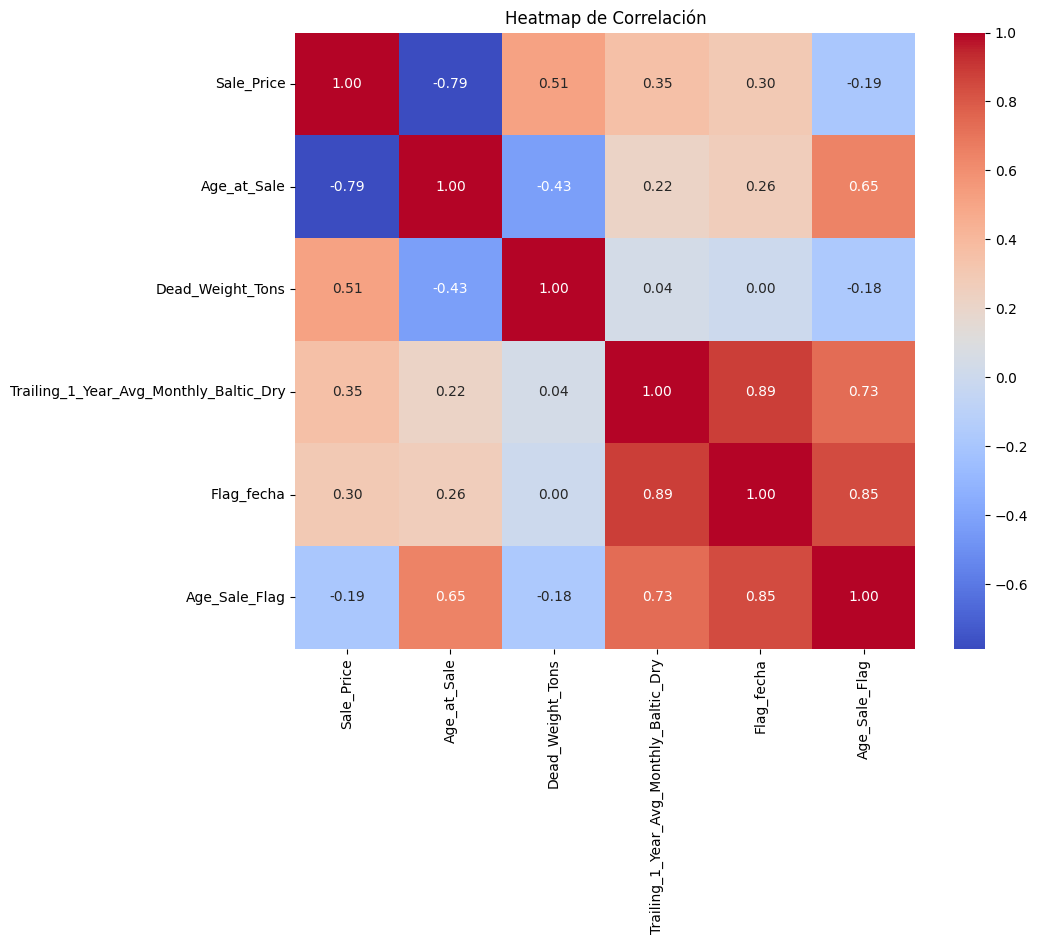

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables independientes y la variable dependiente
variables = ['Sale_Price', 'Age_at_Sale', 'Dead_Weight_Tons', 'Trailing_1_Year_Avg_Monthly_Baltic_Dry', 'Flag_fecha', 'Age_Sale_Flag']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
Ad_df_filtered = Ad_df[variables]

# Calcular la matriz de correlación
correlation_matrix = Ad_df_filtered.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap de Correlación')
plt.show()

### Analisis de Multicolinealidad entre variables independientes

1. Variables con alta correlación (posible multicolinealidad):
- Trailing_1_Year_Avg_Monthly_Baltic_Dry y Flag_fecha: Correlación alta (r=0.89), indicando una posible redundancia significativa entre estas variables
- Flag_fecha y Age_Sale_Flag: Correlación alta (r=0.85), lo que sugiere que estas variables pueden estar proporcionando información similar al modelo.
- Trailing_1_Year_Avg_Monthly_Baltic_Dry y Age_Sale_Flag: Correlación moderada-alta (r=0.73), lo que refuerza la existencia de cierta redundancia adicional.

2. Variables con baja correlación (baja multicolinealidad):
- Age_at_Sale y Dead_Weight_Tons: Correlación baja (r=−0.43), lo que sugiere que estas variables aportan información complementaria al modelo y no están relacionadas de forma redundante.
-Age_at_Sale y Trailing_1_Year_Avg_Monthly_Baltic_Dry: Correlación baja (r=0.22), indicando una relación mínima entre estas características.
-Dead_Weight_Tons y Flag_fecha: Correlación baja (r=0.00), lo que demuestra que estas variables son completamente independientes entre sí.

**Impacto en el modelo:** Las variables con alta correlación podrían generar multicolinealidad, dificultando la estimación precisa de los coeficientes y afectando la interpretación de los resultados.
Las variables con baja correlación son útiles para el modelo, ya que aportan información única y no redundante, mejorando su capacidad predictiva.

### Visualización de las bandas de confianza en regresión lineal simple

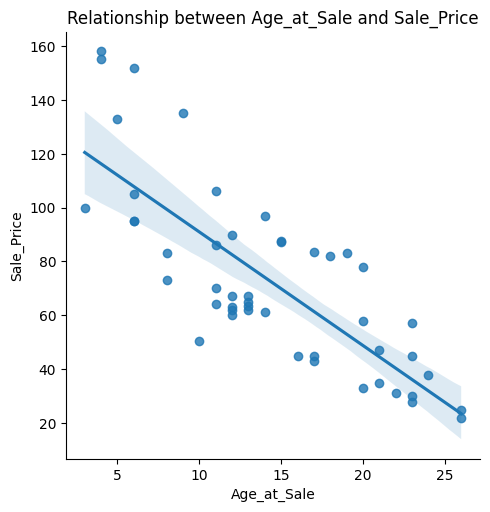

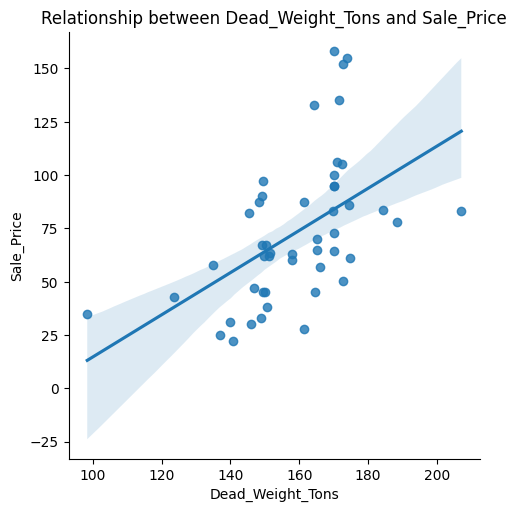

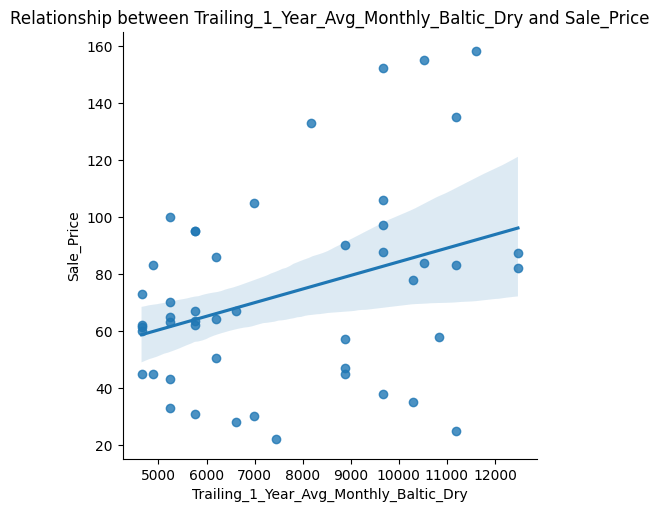

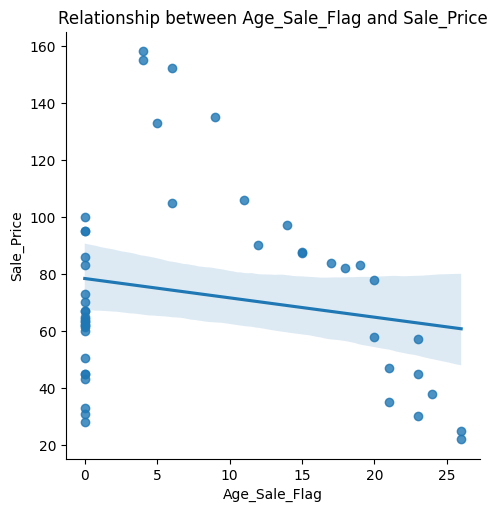

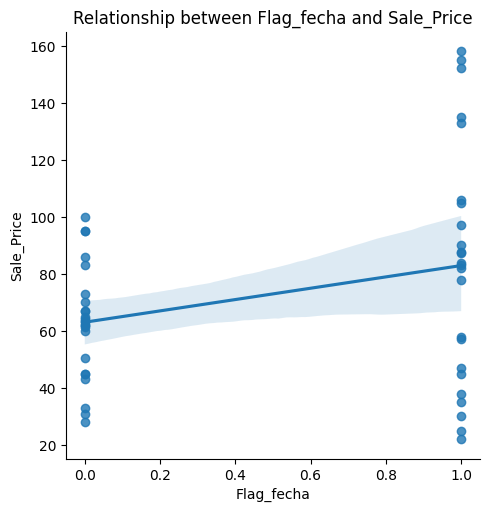

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables independientes
independent_vars = ['Age_at_Sale', 'Dead_Weight_Tons', 'Trailing_1_Year_Avg_Monthly_Baltic_Dry', 'Age_Sale_Flag', 'Flag_fecha']

# Crear un lmplot para cada variable independiente frente a Sale_Price
for var in independent_vars:
    sns.lmplot(x=var, y='Sale_Price', data=Ad_df)
    plt.title(f'Relationship between {var} and Sale_Price')
    plt.show()



### Analisis de linealidad

1. Variables con alta correlación (relación fuerte):
- Age_at_Sale (r=−0.79):Tiene una correlación negativa fuerte con Sale_Price, indicando que a mayor edad del producto al momento de la venta, menor es el precio de venta.

  - Gráfico: La línea de regresión muestra una pendiente negativa clara, con puntos bien alineados, confirmando una relación fuerte y consistente.

- Dead_Weight_Tons (r=0.51):Presenta una correlación moderada positiva, lo que sugiere que mayores pesos muertos están asociados con precios de venta más altos.

  - Gráfico: La línea de regresión tiene una pendiente positiva, aunque los puntos están más dispersos, indicando una relación moderada.

2. Variables con correlación moderada o baja:

- Trailing_1_Year_Avg_Monthly_Baltic_Dry (r=0.35):Tiene una correlación positiva moderada con el precio, indicando que las condiciones del mercado en el último año influyen ligeramente en el precio de venta.

  - Gráfico: La pendiente de la línea de regresión es positiva, pero la dispersión de los puntos es considerable, indicando un impacto limitado.

- Flag_fecha (r=0.30): Muestra una correlación positiva débil, indicando que esta variable tiene una influencia limitada en el precio de venta.

  - Gráfico: La pendiente de la línea de regresión es casi plana, y los puntos están discretamente agrupados, reflejando un impacto mínimo.

- Age_Sale_Flag (r=−0.19): Muestra una correlación negativa débil con Sale_Price, lo que sugiere que su impacto es marginal y posiblemente redundante.

  - Gráfico: La línea de regresión tiene una pendiente negativa muy leve, con alta dispersión, reflejando una relación poco significativa.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Modelos

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = Ad_df.drop(columns=['Sale_Price','Sale_Price_Predicted','Error','Sale Date','Vessel Name','year Built'])
y = Ad_df['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
print("Columnas del DataFrame:", X.columns)

Columnas del DataFrame: Index(['Age_at_Sale', 'Dead_Weight_Tons',
       'Trailing_1_Year_Avg_Monthly_Baltic_Dry', 'Flag_fecha',
       'Age_Sale_Flag'],
      dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular el MSE y R^2 en el conjunto de prueba
mse_ols = mean_squared_error(y_test, y_pred)
rmse_ols = np.sqrt(mse_ols)
R2_test = r2_score(y_test, y_pred)

print(f"El Error Cuadrático Medio (MSE) en el conjunto de prueba es: {mse_ols}")
print(f"El Error Cuadrático Medio (RMSE) en el conjunto de prueba es: {rmse_ols}")
print(f"El coeficiente de determinación R^2 en el conjunto de prueba es: {R2_test}")

El Error Cuadrático Medio (MSE) en el conjunto de prueba es: 53.10789890633855
El Error Cuadrático Medio (RMSE) en el conjunto de prueba es: 7.287516648786371
El coeficiente de determinación R^2 en el conjunto de prueba es: 0.8912563818716593


## Regularización

## Regresión Ridge

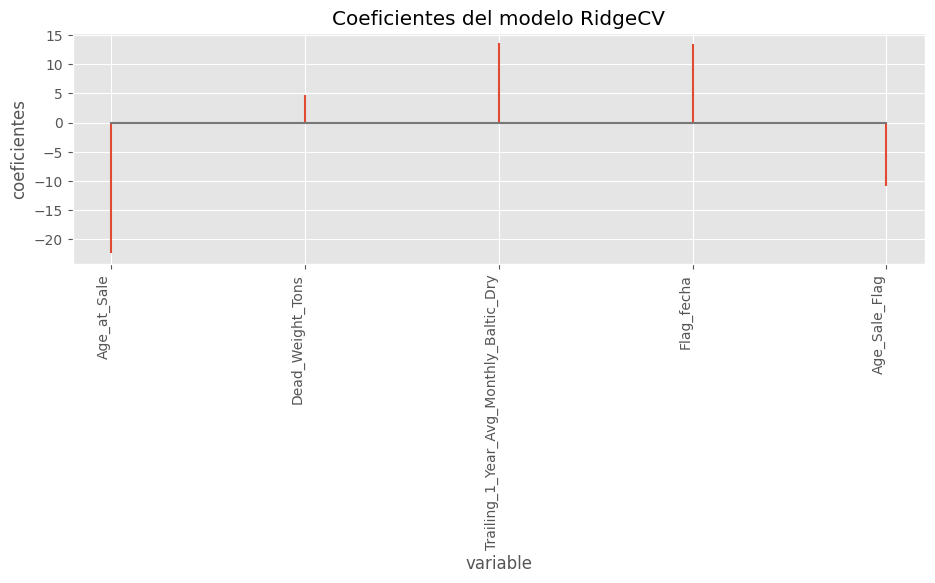

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
# Crear un pipeline que primero escale los datos y luego ajuste el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RidgeCV(
        alphas=np.logspace(-10, 2, 200),
        fit_intercept=True,
        store_cv_values=True
    ))
])

pipeline.fit(X_train, y_train)
modelo = pipeline.named_steps['model']
df_coeficientes = pd.DataFrame(
    {'predictor': X_train.columns,
     'coef': modelo.coef_.flatten()}
)
fig, ax = plt.subplots(figsize=(11, 3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo RidgeCV')
plt.show()


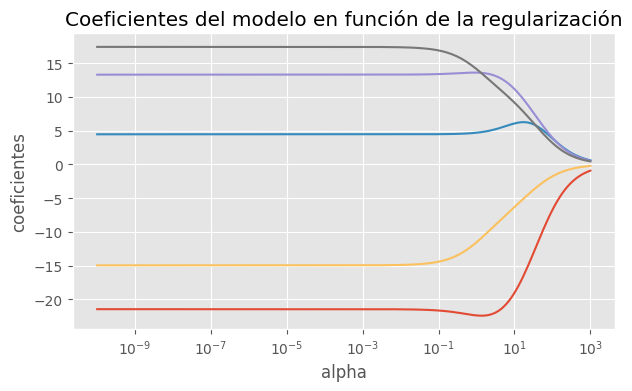

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
# Evolución de los coeficientes en función de alpha
# ==============================================================================
# Definir alphas para la regularización
alphas = np.logspace(-10, 3, 200)
coefs = []

# Iterar sobre cada valor de alpha
for alpha in alphas:
    # Crear un pipeline que normaliza los datos y luego ajusta el modelo Ridge
    modelo_temp = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=False))
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.named_steps['ridge'].coef_.flatten())

# Visualización de la evolución de los coeficientes en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.axis('tight')
plt.show()

- En la región donde **alpha** toma valores pequeños (entre \(10^{-9}\) y \(10^{-2}\)), los coeficientes permanecen prácticamente constantes. Esto indica que estas variables tienen un impacto significativo y constante en la predicción, y la regularización no afecta su contribución al modelo. Estas características son fundamentales para explicar la relación entre las variables independientes y la dependiente.

- A medida que **alpha** aumenta (alrededor de \(10^0\) a \(10^1\)), los coeficientes comienzan a disminuir. Este comportamiento refleja el efecto de la regularización, que penaliza los coeficientes grandes para simplificar el modelo y evitar el sobreajuste. Algunas características pierden relevancia a medida que se incrementa el nivel de regularización, lo que podría indicar redundancia o menor importancia relativa en comparación con otras variables.

- En valores altos de **alpha** (por encima de \(10^2\)), la penalización es lo suficientemente fuerte como para reducir muchos coeficientes a valores cercanos a cero, incluso cambiando el signo de algunos. Este cambio sugiere que ciertas variables ya no tienen una relación significativa con la variable dependiente bajo este nivel de penalización. En este escenario, el modelo prioriza únicamente las características más robustas y relevantes, eliminando aquellas que contribuyen marginalmente o que podrían añadir ruido.

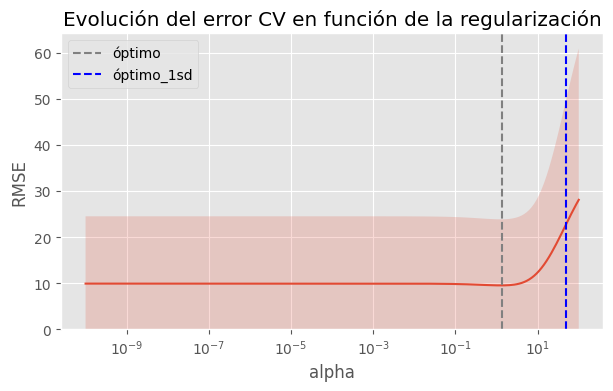

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = np.sqrt(mse_sd[np.argmin(rmse_cv)])  # Se calcula la raíz cuadrada del MSE_SD
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])

# Se obtiene el valor óptimo de alpha
optimo       = modelo.alphas[np.argmin(rmse_cv)]

# Se obtiene el valor de alpha que corresponde a min_rsme_1sd, si existe
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]



# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1.350993521198025


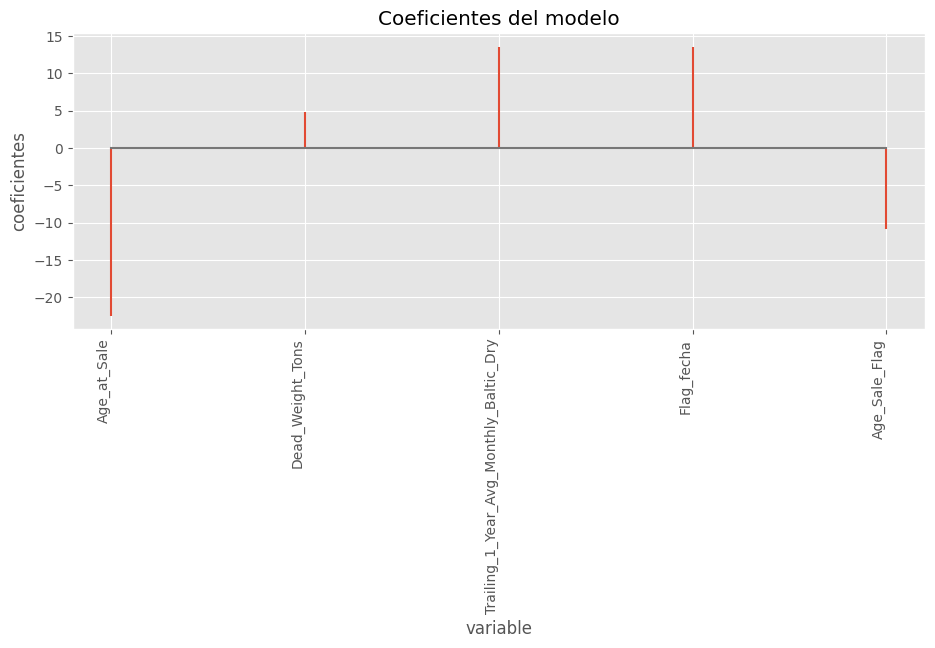

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test utilizando el pipeline
# ==============================================================================
predicciones = pipeline.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 62.39538717, 103.81762423,  91.61829749,  63.25482076,
        50.72107348,  37.03390818,  58.06153945,  46.4845085 ,
        91.61829749,  25.98777822])

In [ ]:
from sklearn.metrics import mean_squared_error

# Error de test del modelo RidgeCV
# ==============================================================================
mse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
             )
rmse_ridge = np.sqrt(mse_ridge)
print("")
print(f"El error (RMSE) de test es: {rmse_ridge}")


El error (RMSE) de test es: 7.508339856943451


Las predicciones del modelo final se alejan en promedio 7.508 del valor real.

## Regresión Lasso


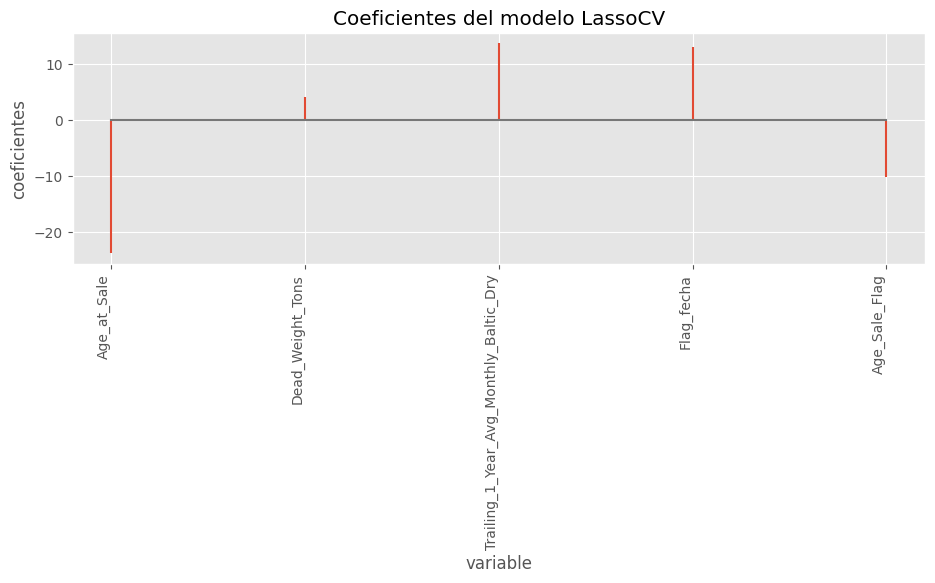

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creación y entrenamiento del modelo con búsqueda por CV del valor óptimo alpha
# ==============================================================================
# Definir el pipeline que incluye el escalado y LassoCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LassoCV(alphas=np.logspace(-10, 3, 200), cv=10))
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Obtener el mejor modelo de LassoCV del pipeline
modelo = pipeline.named_steps['model']

# Coeficientes del modelo
df_coeficientes = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': modelo.coef_
})

# Visualización de los coeficientes del modelo
fig, ax = plt.subplots(figsize=(11, 3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo LassoCV')
plt.show()

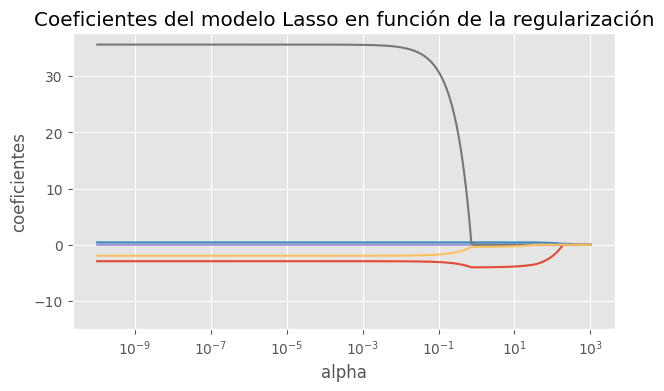

In [ ]:
from sklearn.linear_model import LassoCV

# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Definir el modelo LassoCV para encontrar el mejor alpha automáticamente
modelo = LassoCV(alphas=np.logspace(-10, 3, 200), cv=10)

# Ajustar el modelo a los datos de entrenamiento
_ = modelo.fit(X_train, y_train)

# Obtener los alphas utilizados durante la búsqueda (opcional)
alphas = modelo.alphas_

# Evolución de los coeficientes en función de alpha
coefs = []
for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_)

# Visualización de la evolución de los coeficientes en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15, None])  # Ajusta el límite y según tus datos
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Lasso en función de la regularización')
plt.show()

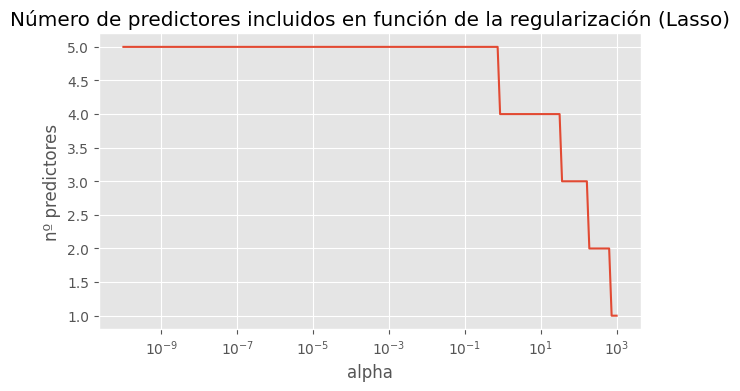

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

# Creación y entrenamiento del modelo LassoCV para búsqueda de alpha óptimo
modelo = LassoCV(alphas=np.logspace(-10, 3, 200), cv=10)

# Ajustar el modelo a los datos de entrenamiento
_ = modelo.fit(X_train, y_train)

# Obtener los alphas utilizados durante la búsqueda (opcional)
alphas = modelo.alphas_

# Número de predictores incluidos en función de alpha
n_predictores = []
for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_ != 0)
    n_predictores.append(coef_no_cero)

# Visualización del número de predictores incluidos en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Número de predictores incluidos en función de la regularización (Lasso)')
plt.show()

En valores bajos de **alpha** (entre \(10^{-9}\) y \(10^{-2}\)), el modelo incluye consistentemente los cinco predictores originales, indicando que la regularización es lo suficientemente baja como para permitir que todas las variables contribuyan al modelo. Esto significa que, en este rango, el modelo no penaliza significativamente los coeficientes, lo que permite que todas las características mantengan su influencia en la predicción.

A medida que **alpha** aumenta (alrededor de \(10^{-1}\) a \(10^{1}\)), el modelo comienza a excluir algunas variables, reduciendo gradualmente el número de predictores incluidos. Este comportamiento refleja que la regularización está penalizando los coeficientes más pequeños, forzándolos a ser exactamente cero. En esta etapa, Lasso selecciona únicamente las variables más importantes, eliminando aquellas que tienen una contribución marginal o redundante.

Cuando **alpha** alcanza valores altos (por encima de \(10^{2}\)), el modelo se reduce drásticamente a solo uno o dos predictores. Esto indica que la regularización ha eliminado prácticamente todas las variables excepto aquellas que tienen la relación más fuerte con la variable dependiente. Finalmente, en valores extremadamente altos de **alpha**, el modelo incluye únicamente un predictor, priorizando la simplicidad y eliminando cualquier redundancia o complejidad adicional.


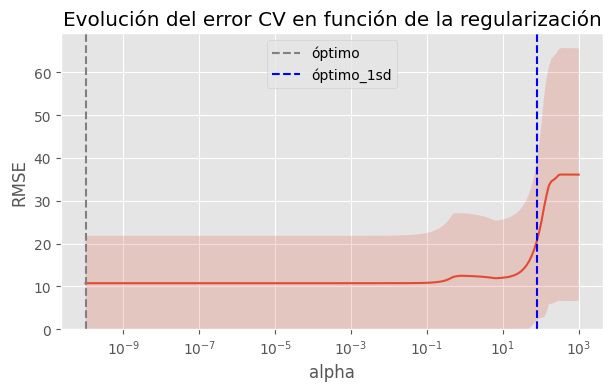

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Valor de alpha óptimo + 1SD: {optimo_1sd[0]}")

Mejor valor de alpha encontrado: 1e-10
Valor de alpha óptimo + 1SD: 77.52597488629465


In [ ]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creación y entrenamiento del modelo LassoCV
# ==============================================================================
modelo = LassoCV(
            alphas    = np.logspace(-10, 3, 200),
            cv        = 10
         )
_ = modelo.fit(X_train, y_train)

# Mejor valor alpha encontrado
optimo = modelo.alpha_

# Crear un pipeline que primero escale los datos y luego ajuste el modelo Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=optimo))
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Ejemplo de predicciones en el conjunto de prueba
predicciones = pipeline.predict(X_test)
predicciones[:10]

array([ 61.7971572 , 103.78207062,  89.79563611,  62.40366925,
        49.56273936,  34.30353406,  57.50551152,  44.36080414,
        89.79563611,  27.20111576])

Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada.

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Asegúrate de que optimo_1sd sea un array de numpy
optimo_1sd = np.array(optimo_1sd) if isinstance(optimo_1sd, list) else np.array([optimo_1sd])

if optimo_1sd.size > 0:
    # Obtener el mejor valor de alpha encontrado + 1sd
    alpha_optimo_1sd = float(optimo_1sd[0])  # Convertir el primer elemento en float si es necesario

    # Crear y ajustar el modelo Lasso con el alpha óptimo + 1sd
    modelo_lasso = Lasso(alpha=alpha_optimo_1sd, fit_intercept=False)
    modelo_lasso.fit(X_train, y_train)

    # Aquí puedes realizar cualquier operación adicional con el modelo ajustado
    print("Modelo Lasso ajustado con éxito.")
else:
    print("No se encontraron valores en optimo_1sd. Revisa tu código o los resultados obtenidos.")

Modelo Lasso ajustado con éxito.


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Age_at_Sale,-3.420895
1,Dead_Weight_Tons,0.259412
2,Trailing_1_Year_Avg_Monthly_Baltic_Dry,0.005534
3,Flag_fecha,34.835872
4,Age_Sale_Flag,-1.670431


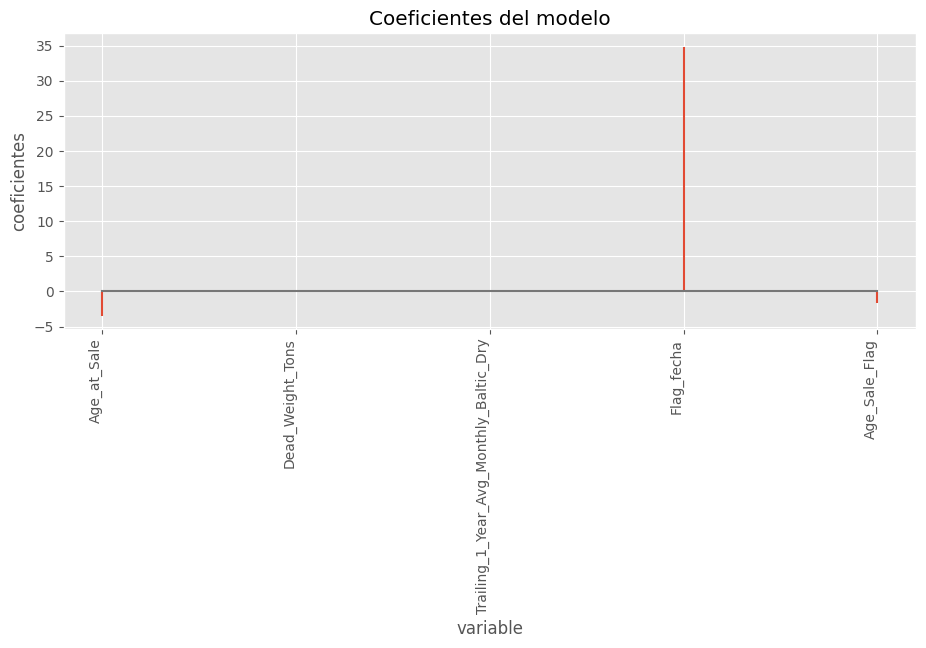

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 61.7971572 , 103.78207062,  89.79563611,  62.40366925,
        49.56273936,  34.30353406,  57.50551152,  44.36080414,
        89.79563611,  27.20111576])

In [ ]:
# Error de test del modelo
# ==============================================================================
mse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
             )
rmse_lasso = np.sqrt(mse_lasso)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 7.287516649079657


Las predicciones del modelo final se alejan en promedio 7.285 unidades del valor real, utilizando los 5 predictores disponibles

## Comparación

Se compara el error de test (rmse) de los 4 modelos


In [ ]:
import pandas as pd
import plotly.express as px

# Crear el DataFrame
df_comparacion = pd.DataFrame({
    'modelo': ['rmse_ols', 'Ridge', 'Lasso'],
    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso]
})

# Crear gráfico dinámico con Plotly
fig = px.bar(
    df_comparacion,
    x='test rmse',
    y='modelo',
    orientation='h',  # Barras horizontales
    title='Comparación de modelos',
    labels={'test rmse': 'RMSE', 'modelo': 'Modelo'},
    text='test rmse'  # Mostrar valores en las barras
)

# Mejorar diseño
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Formato de valores
fig.update_layout(
    xaxis_title="RMSE",
    yaxis_title="Modelo",
    yaxis=dict(categoryorder='total ascending')  # Ordenar de menor a mayor
)

# Mostrar el gráfico
fig.show()


En este caso el mejor modelo se obtiene aplicando regularización Lasso como OLS. Ambos modelos tienen un error inferior al modelo Ridge, además emplean los 5 predictores.

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
print("Los coeficientes del modelo Lasso son:")
df_coeficientes[df_coeficientes.coef != 0]

Los coeficientes del modelo Lasso son:


,predictor,coef
0,Age_at_Sale,-3.420895
1,Dead_Weight_Tons,0.259412
2,Trailing_1_Year_Avg_Monthly_Baltic_Dry,0.005534
3,Flag_fecha,34.835872
4,Age_Sale_Flag,-1.670431
